# Control Structures - Lab 3, Python for Text, Fall 2020

---




---

To be completed and submitted by Tuesday, September 15. 

This week, I have changed the formatting of the lab just a little bit. The questions you need to answer now are marked with **QUESTION**. For each one, there's a space (under **ANSWER**) for you to add your answer, which might be text, might be code, or might be a mix of the two. 


### Have questions?

1. Use the Canvas discussion boards.

## Reminder

You will need to submit your own notebook (or rather, a link to your own notebook). There are (at least) two ways to do this:

1. Make a copy of this notebook, rename it, and add new code cells when you want to write your own code.
1. Create a new Python 3 notebook using the `File` menu and type in all cells yourself. 

Either way, your file should be named using this format: `LastName_Py4Text_Lab3.ipynb`

# **Overview: Searching news text for particular words**

This week we will work toward building a small system that will allow a user to search news text for particular words and retrieve the sentences with those words. Our system will also be able to find words of certain types, like all words longer that 10 letters, or all words ending in "-ness". We'll work with both the news section of the Brown Corpus and with the Wall Street Journal corpus. To do this, we will need to move beyond writing one statement at a time and start learning some methods for controlling the flow of the program - these are what we call **control structures** (like `if`-conditions and `for`-loops).

Things you should be able to do at the end of this lab:

* Read in news data from the NLTK in several forms (as a list of sentences, as a list of words, as one long string)
* Understand and be able to write **conditional statements** (`if`-statements, `if-else` statements, and `if-elif-else` statements)
* Use conditional statements to search news data
* Convert absolute counts of words (in a document or corpus) to percentage counts
* Understand and be able to write **`for`-loops** for iterating through sequences
* Write simple list comprehensions
* Print results to a file

Let's go! (first a bit of xkcd)

https://imgs.xkcd.com/comics/it_begins.png

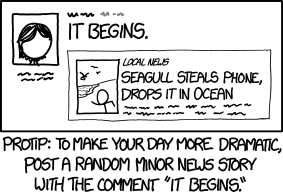

# 0. Preliminaries

To get started, import the NLTK and download the book data.

In [ ]:
import nltk
nltk.download('book')  ## the 'book' download includes the Brown Corpus 


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

# 1. Corpus readers in the NLTK

A **corpus** is a group of texts, collected according to some set of guidelines, available in machine-readable format and suitable for computational research. The NLTK comes with a collection of text corpora (plural of *corpus*) -- here's a list: http://www.nltk.org/nltk_data/

To add a new corpus to the NLTK, it is required to make it easy for users to access that corpus. This means that for each corpus, there is a **corpus reader**. The corpus reader is basically python code for accessing the data in convenient ways - this is great for us as users, because it means we don't have to worry about what format the texts in the corpus are in. We can rely on the corpus reader to handle issues related to format.

Not every NLTK corpus reader has all of the same functions, but there are some methods that you find in most readers.

* `words()` -- returns the corpus text as a list of words
* `sents()` -- returns the corpus text as a list of sentences. Sometimes each sentence is in the form of a list of words, and sometimes each sentence is a string.
* `paras()` -- returns the corpus text as a list of paragraphs
* `raw()` -- returns the corpus text as one long string


If we use these functions without any argument (nothing between the parentheses), the methods will return *all* of the text from the corpus. Often, though, we want to use just part of a corpus. We've seen this already in the last lab, when we looked at the 'news' section of the Brown Corpus. For the Brown Corpus, we specify which sections we're interested in using the argument `categories='news'` (or whichever category or categories we're interested in).

Try these functions out on a mixed corpus of Brown news and editorial data. Notice that we need to use list notation if we want more than one category at a time (`categories=['news','editorial']`).






In [ ]:
### import the corpus directly
from nltk.corpus import brown

### see a list of categories
brown.categories()

### store the data in these different ways
newsEd_words = brown.words(categories=['news', 'editorial']) 
newsEd_sents = brown.sents(categories=['news', 'editorial'])
newsEd_paras = brown.paras(categories=['news', 'editorial'])
newsEd_raw = brown.raw(categories=['news', 'editorial'])

### how many words in the mixed data set?
print(len(newsEd_words))

### what about only in the news data?
news_words = brown.words(categories='news')
print(len(news_words))

162158
100554


-----
### **QUESTION/ANSWER:**

> Using the `len()` function, fill in the following table:

type of data | news only | editorials only | combined news & editorial
 --- | --- | --- | ---
# words | 100,554 | 61,604 | 162,158  |
# sentences | 4,623  | 2,997  | 7,620  |
# paragraphs | 2,234  | 1,003   | 3,237
# characters | 883,606  | 538,695  | 1,422,301

If you need help with how to do tables in Colab Markdown, check here: https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=tPqPXAKKkzaM

Show the code that you use to compute each of these numbers.

-----


In [ ]:
from nltk.corpus import brown
brown.categories()
news_words = brown.words(categories = ['news'])
news_sents = brown.sents(categories = ['news'])
news_paras = brown.paras(categories = ['news'])
news_raw = brown.raw(categories = ['news'])
print("This is News data:")
print(len(news_words))
print(len(news_sents))
print(len(news_paras))
print(len(news_raw))
edit_words = brown.words(categories = ['editorial'])
edit_sents = brown.sents(categories = ['editorial'])
edit_paras = brown.paras(categories = ['editorial'])
edit_raw = brown.raw(categories = ['editorial'])
print("This is Editorial data:")
print(len(edit_words))
print(len(edit_sents))
print(len(edit_paras))
print(len(edit_raw))
print("This is News & Editorial combined:")
newsED_words = brown.words(categories = ['news', 'editorial'])
newsED_sents = brown.sents(categories = ['news', 'editorial'])
newsED_paras = brown.paras(categories = ['news', 'editorial'])
newsED_raw = brown.raw(categories = ['news', 'editorial'])
print(len(newsED_words))
print(len(newsED_sents))
print(len(newsED_paras))
print(len(newsED_raw))

This is News data:
100554
4623
2234
883606
This is Editorial data:
61604
2997
1003
538695
This is News & Editorial combined:
162158
7620
3237
1422301


Table 1.3 in Chapter 2 of the NLTK book gives an overview of some of the commonly-available corpus reader methods:
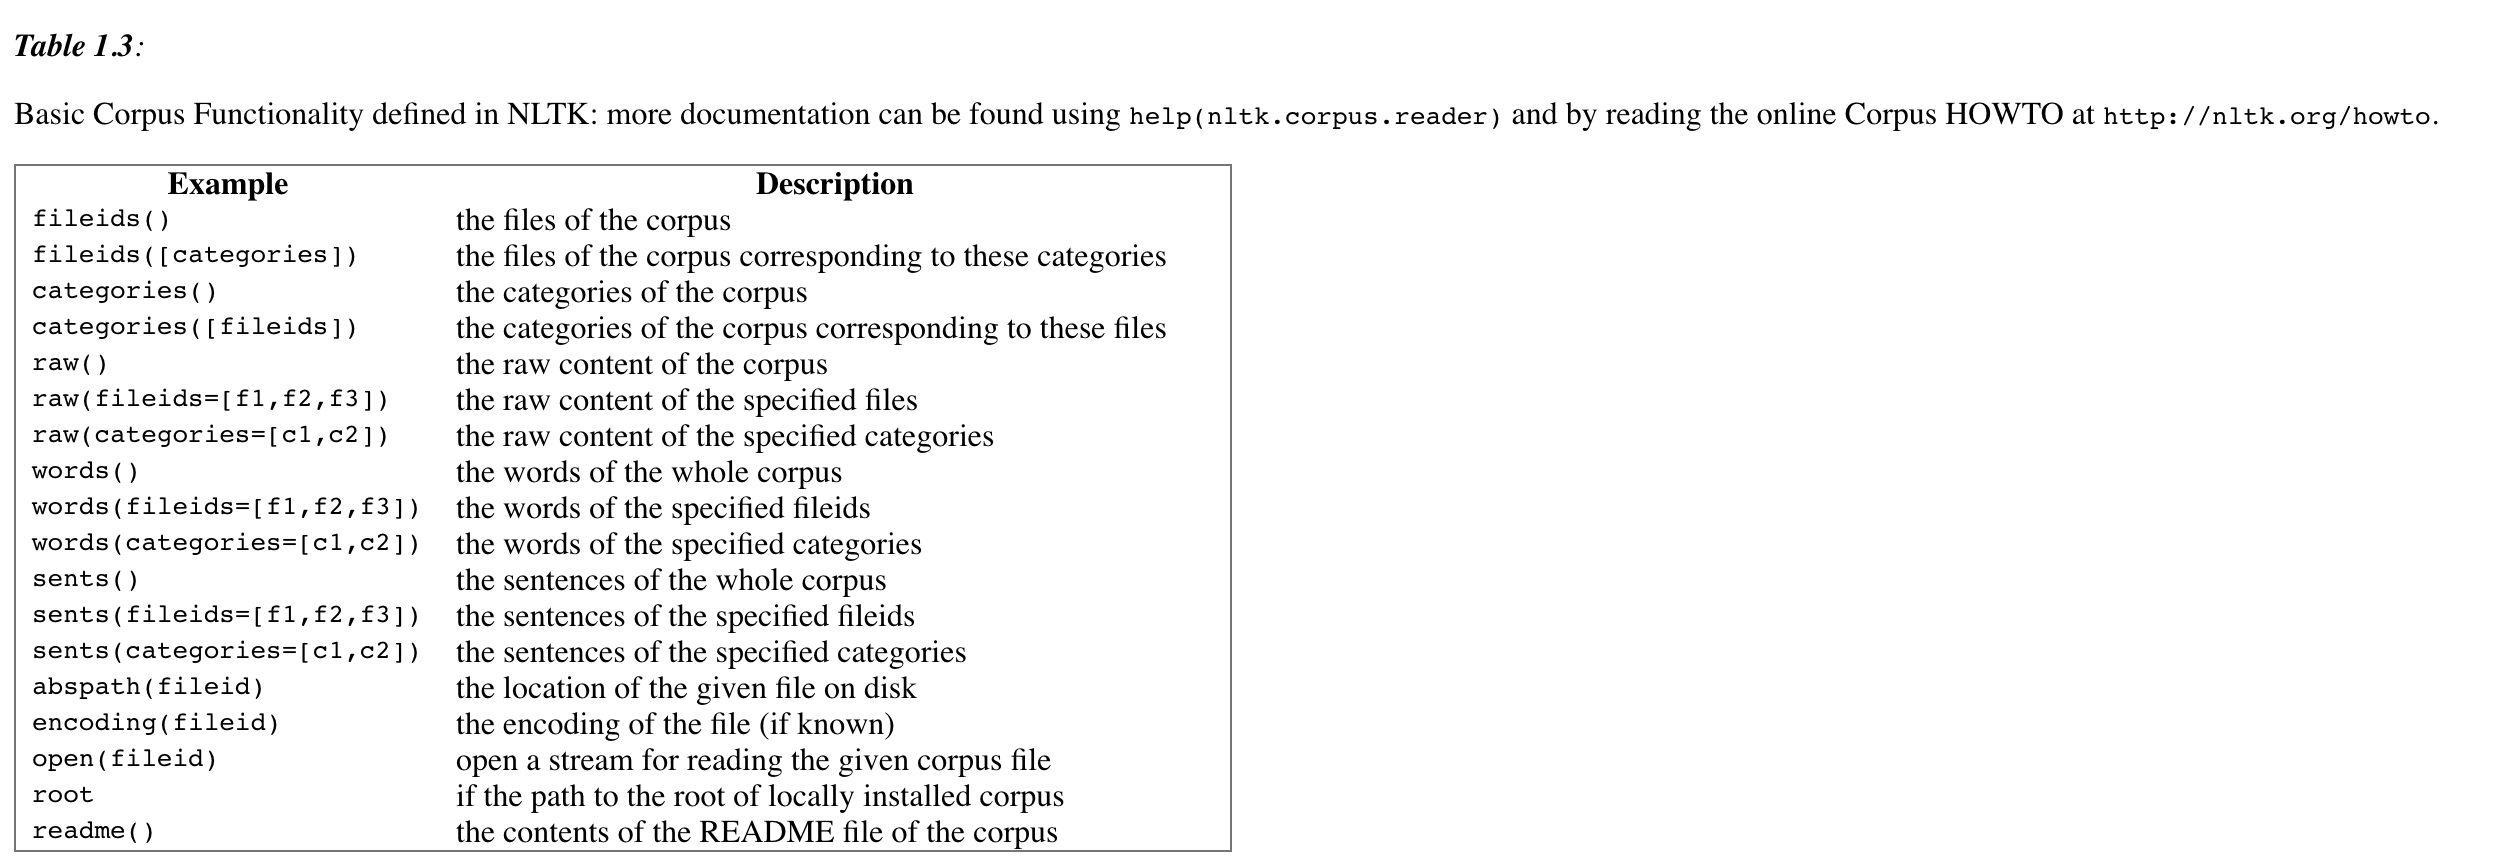

Corpora can be organized in different ways, and we'll learn more about this later in the semester. For now, we have seen one way of organizing a corpus - into categories. Each category (or genre of text) in the Brown Corpus contains a number of different texts, and each texts has its own fileid. When specifying which subparts of the corpus we want to retrieve, we can use either categories or fileids.

In [ ]:
print(brown.categories())
print(brown.fileids())
print("number of categories:", len(brown.categories()))
print("number of fileids:", len(brown.fileids()))

['adventure', 'belles_lettres', 'categories', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20', 'ca21', 'ca22', 'ca23', 'ca24', 'ca25', 'ca26', 'ca27', 'ca28', 'ca29', 'ca30', 'ca31', 'ca32', 'ca33', 'ca34', 'ca35', 'ca36', 'ca37', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'ca44', 'cb01', 'cb02', 'cb03', 'cb04', 'cb05', 'cb06', 'cb07', 'cb08', 'cb09', 'cb10', 'cb11', 'cb12', 'cb13', 'cb14', 'cb15', 'cb16', 'cb17', 'cb18', 'cb19', 'cb20', 'cb21', 'cb22', 'cb23', 'cb24', 'cb25', 'cb26', 'cb27', 'cc01', 'cc02', 'cc03', 'cc04', 'cc05', 'cc06', 'cc07', 'cc08', 'cc09', 'cc10', 'cc11', 'cc12', 'cc13', 'cc14', 'cc15', 'cc16', 'cc17', 'cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd1

In [ ]:
## We can also get the fileids for one category
newsFiles = brown.fileids(categories='news')
print(newsFiles)

['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20', 'ca21', 'ca22', 'ca23', 'ca24', 'ca25', 'ca26', 'ca27', 'ca28', 'ca29', 'ca30', 'ca31', 'ca32', 'ca33', 'ca34', 'ca35', 'ca36', 'ca37', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'ca44']


-----

### **QUESTION:**

> How many files are there in the `news` category of the Brown Corpus? Pick one other category (your choice) - how many files in that category? Show the code you used to get these numbers.

### **ANSWER:**

> 

-----

In [ ]:
news_files = brown.fileids(categories = 'news')
print(len(news_files))
print("Number of News Files:", len(news_files))
adv_files = brown.fileids(categories = 'adventure')
print("Number of Adventure Files:", len(adv_files))

44
Number of News Files: 44
Number of Adventure Files: 29


# 2. Conditionals: `if` - `else` - `elif`

Conditional statements are both simple and powerful! Conditionals allow us to set conditions on when a particular piece of code should and shouldn't be run. To start with a simple example, we could use a conditional to let somebody know whether or not they passed a driving test. 

Let's say that a score of 80 or higher is required to pass the driving test. We'll store a score in a variable, and then we'll use an `if` statement to determine whether the student with that score passes the test.

In [ ]:
### first we'll store one student's score in a variable
score = 78

### now we set up our conditional
if score >= 80:
    print("Congratulations, and here's your driving license!") #if only it were this simple in real life


Now go back up and change the score to something below 80 and re-run the code block. What happens? (the answer should be - nothing gets printed.)

The `if` statement has the following structure - we start with the keyword `if` and follow it with a condition. The condition must be formulated as an expression that evaluates to either `True` or `False`. If the condition is `True`, python executes the code immediately below the `if` statement. Notice that this code is indented - this is crucial for making your conditional work. If you want to run more than one line of code, no problem! Just make sure that all of the code you want to run (if the condition is `True`) is also indented.

In [ ]:
### first we'll store one student's score in a variable
score = 88

### now we set up our conditional
if score >= 80:
    print("Congratulations, and here's your driving license!")
    print("Please drive safely!")


Congratulations, and here's your driving license!
Please drive safely!


Very often, we want to run some code if the condition evaluates to `True`, and different code if the condition evaluates to `False`. To do this, we add an `else:` line. The indented code block under `else:` will run only if the condition is `False`.

In [ ]:
### first we'll store one student's score in a variable
score = 79.5

### now we set up our conditional
if score >= 80:
    print("Congratulations, and here's your driving license!") 
else:
    print("Sorry, you didn't pass. Better luck next time!")

Sorry, you didn't pass. Better luck next time!


Go back up and change the score - see for yourself the different conditions under which each indented code block gets triggered.

Before you go on to the question below, read sections 5.2-5.7 from Think Python, chapter 5 ("Conditions and Recursion") to learn more about different kinds of Boolean statements you can use for the condition in your `if` statement: http://greenteapress.com/thinkpython2/html/thinkpython2006.html

-----
### **QUESTION:**

> Write a new `if`/`else` block similar to the one above, but for some other situation. What is the situation, what are you testing? Be sure you have indented code blocks for both the `True` case and the `False` case.

### **ANSWER:**

> My nested code block is determing whether the input has a positive or negative value. I am testing to see if my code can correctly identify positive and negative values.

-----

In [ ]:
number = 1.3
if number > 0:
  num_value = "positive";
  print("This number has a positive value.")

This number has a positive value.


So far we have crafted simple `if`/`else` blocks, with simple conditions. In some cases, we may want to test for **multiple conditions** in a single `if` statement, or we may want to have a code block that allows for different reactions (in other words, different code run) for more than two cases - **multiple cases**. In Python, we do multiple conditions with logical operators, and we handle multiple cases with `if`/`elif`/`else` structures.

Time for more reading: please read pages 75-88 in Python Crash Course to learn more about conditionals.

-----

### **QUESTION:**

> Can you modify the situation you described for the previous question so that you need multiple cases? If not, come up with a new situation in which it would be helpful to have different code responses for three or more different cases. 

> Write an `if`/`elif`/`else` code block below for your situation.

### **ANSWER:**

-----



In [ ]:
number = -1.3
if number > 0:
  num_value = "positive";
  print("This number has a positive value.")
else:
  if number < 0:
    num_value = "negative";
    print("This number has a negative value.")

This number has a negative value.


When working with textual data, we often want to check whether a particular text contains a word that we're interested in. One way to do this is using the special operator `in`. This lets us test whether a particular element is contained within a sequence. Aha, that keyword "sequence" should tell you that this is something we can use on both lists and strings. For lists, we check whether our search term (x) is a member of the list. For strings, we check whether the search term is contained within the string - whether it's a substring.

Take a look at the examples below (run the code block).

In [ ]:
### first establish some variables
mylist = ['the','quick','brown','fox','jumps','over','the','lazy','dog']
mystring = 'cats'

### now let's see how to use the in operator

print('the' in mylist)   # returns True, because 'the' is an element of the list
print('the quick' in mylist) # returns False, because the string 'the quick' is *not* an element of the list
print(37 in mylist) # returns False, because the number 37 is not an element of the list
print()

print('ts' in mystring) # returns True, because 'ts' is a substring of 'cats'
print('as' in mystring) # returns False - both characters are in the string, but not next to each other
print('cats' in mystring) # returns True, because the whole string is also a substring of itself

True
False
False

True
False
True


# 3. Iteration: `for`-loops

In this unit we introduce our next new method for controlling the flow of your programs - the `for`-loop. Just like `if`-statements, `for`-loops are both simple and powerful.  The `for` loop gives us an easy way to repeat code a specific number of times - the theoretical term for this is **definite iteration** - we're iterating through a sequence of known length and repeating a block of code once for each item in the sequence.

Reading time: please read pages 53-69 in Python Crash Course.

`for` loops have the following structure:

* first line: `for <temporary variable> in <sequence>:` - the colon (:) at the end is essential, as it tells Python that there's more code to come
* the temporary variable changes its value with each iteration - in each iteration it gets assigned the value of the next item in the sequence
* the sequence (usually a list or a string) is what *drives* the loop - the code block gets repeated once for each item in the sequence
* indented code block: the code that you want to run within the loop. Usually, this code will perform actions on the item stored as the temporary variable

Let's look at an example, to make this all more concrete.

In [ ]:
### create a list to use in our example
mylist2 = ['everything', 'is', 'coming', 'up', 'roses']

### the for-loop will iterate through the list,
### each time printing the next item from the list, but in uppercase
for word in mylist2:
    print(word.upper())

EVERYTHING
IS
COMING
UP
ROSES


`for` loops may take a little getting used to, but once you get them, they're very intuitive to use.

If you are curious about what's happening under the hood during a `for`-loop, I highly recommend the **code visualization** mode from http://www.pythontutor.com/. Once you're in the visualization mode, paste in the code above (or a similar example), and then click "Visualize Execution". 

* On the left-hand side is a window with your code. The red arrow points to the next line that will be executed, and the green arrow points to the line that was most-recently executed. 
* On the right-hand side at the top is a window that shows what the program will print out
* Below the print window you can see each variable created by the program and its current value. Notice how the value of `word` changes with each step through the list.

## `for`-loops with list slices

Sometimes, you only want to do things with part of your list, not the entire thing. To do this, instead of putting just the list name as the last part of your `for` statement, use a slice. When you do this, python treats the list slice as what's driving the `for`-loop. The code will happen once for each item in the list slice, instead of once for each item in the entire list.

The exercise for this unit of the lab requires that you combine pieces from the earlier units, as well as one piece from Lab 2:

* corpus readers from NLTK
* using fileids in the Brown Corpus
* list slices

-----
### **QUESTION:**

> a. First, choose a category from the Brown Corpus. Then choose one file from within that category. That will be your text for this exercise. Write code to print the first 50 words of the text.

> b. Next, use the appropriate corpus reader method to create a python list of all the words in the text. Store that list to a variable with a sensible name. How many words are there in your text?

> c. Next, use a `for`-loop and a list slice to print the first five words of the text, one word per line.

> d. Next, use a `for`-loop and a list slice to print 5 words from somewhere in the middle of the text, one word per line.

> e. Finally, use a `for`-loop and a list slice to print the last five words of teh text, one word per line.

### **ANSWER:**

> Show your code below.

-----

In [ ]:
print(brown.categories())
print(brown.fileids(categories = 'fiction'))
fiction_words = brown.words(fileids='ck04')
print("\nAnswer A:")
print(fiction_words[:50])
#using the same function for question b
print("\nAnswer B:")
print(len(fiction_words))
print("\nAnswer C:")
five_words = fiction_words[:5]
for word in five_words:
  print(word)
print("\nAnswer D:")
mid = fiction_words[10:15]
for word in mid:
  print(word)
print("\nAnswer E:")
last = fiction_words[-6:-1]
#assuming last character is period, so increasing the range to output 5 words
for word in last:
  print(word)

['adventure', 'belles_lettres', 'categories', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['ck01', 'ck02', 'ck03', 'ck04', 'ck05', 'ck06', 'ck07', 'ck08', 'ck09', 'ck10', 'ck11', 'ck12', 'ck13', 'ck14', 'ck15', 'ck16', 'ck17', 'ck18', 'ck19', 'ck20', 'ck21', 'ck22', 'ck23', 'ck24', 'ck25', 'ck26', 'ck27', 'ck28', 'ck29']

Answer A:
['The', 'Bishop', 'looked', 'at', 'him', 'coldly', 'and', 'said', ',', '``', 'Take', 'it', 'or', 'leave', 'it', "''", '!', '!', 'Literally', ',', 'there', 'was', 'nothing', 'else', 'to', 'do', '.', 'He', 'was', 'caught', 'in', 'a', 'machine', '.', 'But', 'Sojourner', 'was', 'not', 'easily', 'excited', 'or', 'upset', 'and', 'said', 'quite', 'calmly', ':', '``', "Let's", 'go']

Answer B:
2310

Answer C:
The
Bishop
looked
at
him

Answer D:
Take
it
or
leave
it

Answer E:
if
not
in
all
churches


## Combining `for` and `if`

Now, the big payoff. If we add conditional statements to the `for`-loops above, we have the ability to loop through every word of a text and select only words that meet certain conditions. In this case, we'll use some of the string methods from Lab 2 as those conditions.

The scenario: a political scientist is curious about what sorts of political and/or religious movements were discussed in news texts from the time of the Brown Corpus. Our political scientist is currently in the exploratory phase and is looking for relevant keywords. Let's search for all words in the `news` section of the Brown Corpus that end with the English suffix *-ism*.

To do this, we put the `if` condition *inside* of the `for`-loop. The `for`-loop examines one word at a time, to see whether it meets the condition we have specified. If it does, the word gets added to a list of *-ism* words. If not, nothing happens (`pass` is how we tell Python to do nothing) and we move on to the next word in the list.

In [ ]:
### first we create our word list
### and an empty list to hold the results of our searching
newsWords = brown.words(categories="news")
ismWords = []

### now we create our search structure - 
###   if statement inside of for loop
for word in newsWords:
    if word.endswith("ism"):  ## string method, applied to the variable word
        ismWords.append(word)
    else:
        pass

### Once we're done, we want to look at the results
print("# of -ism words found:", len(ismWords))
for ism in ismWords:
    print(ism)

# of -ism words found: 32
optimism
nationalism
Republicanism
Republicanism
Republicanism
fundamentalism
mechanism
optimism
communism
pessimism
Communism
Communism
Communism
Communism
Communism
sadism
idealism
mechanism
Capitalism
mechanism
antagonism
Communism
Communism
journalism
Mohammedanism
paganism
animism
paternalism
colonialism
paternalism
nationalism
federalism


Lots of talk of Communism!

# 4. Simple list comprehensions: A more compact notation

The structure shown above can be done in a more compact way, using a python structure called a **list comprehension**. 

We'll talk more about the structure of list comprehensions soon, but for now, take a look at this example. It does the same thing as the previous code block, but with much less code.

In [ ]:
### first we create our word list
newsWords = brown.words(categories="news")

### now we create our search structure, this time with a list comprehension
### the results of the search will be stored as a new list directly
ismWords = [word for word in newsWords if word.endswith("ism")]

### Once we're done, we want to look at the results
print("# of -ism words found:", len(ismWords))
for ism in ismWords:
    print(ism)


# of -ism words found: 32
optimism
nationalism
Republicanism
Republicanism
Republicanism
fundamentalism
mechanism
optimism
communism
pessimism
Communism
Communism
Communism
Communism
Communism
sadism
idealism
mechanism
Capitalism
mechanism
antagonism
Communism
Communism
journalism
Mohammedanism
paganism
animism
paternalism
colonialism
paternalism
nationalism
federalism


You've already read briefly about list comprehensions. You can see more examples in section 4 of Chapter 1 in the NLTK book: http://www.nltk.org/book/ch01.html.

For now, it's entirely up to you whether to start using list comprehensions. It is recommended to use list comprehensions (instead of the `for`/`if` structure) when working with very large amounts of data, because list comprehensions are considerably more computationally efficient.

-----

### **QUESTION:**

> Select either one text or one category from the Brown Corpus and create a list of words for your selection.

> Write a list comprehension to find all long words in your selected text. You'll have to decide what counts as long!

> Print out both the length of your list of long words and the contents of the list.

### **ANSWER:**

> Show your code below.

-----

In [ ]:
print(brown.categories())
gov_words = brown.words(categories = 'government')
print(gov_words[:10])
long_words = [word for word in gov_words if len(word) >= 15]
print("Number of lengthy words found:", len(long_words))
print(long_words)


['adventure', 'belles_lettres', 'categories', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['The', 'Office', 'of', 'Business', 'Economics', '(', 'OBE', ')', 'of', 'the']
Number of lengthy words found: 132
['diversification', 'balance-of-payments', 'self-sufficiency', 'government-to-government', 'self-sustaining', 'accomplishments', 'characteristics', 'Representatives', 'Representatives', 'Electrification', 'Representatives', 'Representatives', 'personally-owned', 'personally-owned', 'well-administered', 'privately-owned', 'organizationally', 'personally-owned', 'cost-accounting', 'Notwithstanding', 'non-professional', 'individualistic', 'interpretations', 'Cornell-Dubilier', 'representatives', 'location-minded', 'Sheraton-Biltmore', 'representatives', 'representatives', 'responsibilities', 'recommendations', 'origin/destination', 'intergovernmental', 'Representatives', 'bibliographic

# 5. **QUESTION:** Putting everything together to build a news search system

In this final unit of this lab, your task is to build a simple news search system. Believe it or not, you already have all of the components you need to do this. Your system should do the following:

1. Read in the news section of the Brown Corpus as a list of sentences
2. For a given search term, identify every sentence that contains that search term. Store the identified sentences in a new list.
3. Display the results to the user. Depending on the size of the list, you can show either the first 10 sentences or the entire list.

MY TIP: Don't overthink this, and don't overcomplicate it. Start by building a very simple system, and later you can refine that system. You'll probably feel like the display could be better, and the interface could be more user-friendly, and that there are lots of things you'd like your system to be able to do. These refinements are all great, and you can certainly figure out how to do some of them by searching for tips online! BUT FIRST - make sure you have a working system that does the basic tasks listed above.

As my PhD supervisor said to me over and over again, "Do the dumb thing first." First get a simple system working. Then worry about making it better.

### **ANSWER:** 

> There are two options for building your system

1. Simply open a new code block below.
1. Create a new Colab notebook for your system. If you do that, be sure to give us the link here. 

-----

In [ ]:
from nltk.corpus import brown
from nltk import word_tokenize
list_sen = brown.sents(categories='news')
search_term = ['election']
for x in list_sen:
  index = [word for word in search_term if word in x]
  if (len(index) == len(search_term)):
    identified_sents.append(x)
print(identified_sents)
#Another way:
matching = [sentence for sentence in list_sen if "election" in sentence]
print(matching)

False
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', "''", ',', 'the', 'jury', 'said', ',', '``', 'considering', 'the', 'widespread', 'interest', 'in', 'the', 'election', ',', 'the', 'number', 'of', 'voters', 'and', 'the', 'size', 'of', 'this', 'city', "''", '.'], ['The', 'jury', 'said', 'it', 'did', 'find', 'that', 'many', 'of', "Georgia's", 'regist

# 6. REMINDER: Wrapping up and submitting

Create a revision by going to **File > Save and Pin Revision**.

View your revision history at **File > Revision History**.

To submit: go to **Share** in the upper right corner, click **Get Shareable Link**, change the dropdown menu option to **Anyone with the link can edit**, and then **Copy Link**! This is what you'll submit on Canvas.